In [1]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "/content/drive/MyDrive/Cursos"
!ls

/content/drive/MyDrive/Cursos
dataset    model2.h5  modelo1.ipynb  modelo3.ipynb
model1.h5  model3.h5  modelo2.ipynb  visualizacion.ipynb


In [23]:
model1 = keras.models.load_model('./model1.h5')
model2 = keras.models.load_model('./model2.h5')
model3 = keras.models.load_model('./model3.h5')

In [24]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 28800)             0         
                                                                 
 dense_22 (Dense)            (None, 96)               

In [25]:
def predict(dir):
    # Modelo 1
    image1 = load_img(dir, target_size=(128,128))
    # Modelo 2
    image2 = load_img(dir, target_size=(256,256))
    # Modelo 3
    image3 = load_img(dir, target_size=(256,256))

    img = np.array(image3)
    img = img/255.0
    # # # # # # # # # # # # # # # # # #
    img = img.reshape(1,256,256,3)
    # # # # # # # # # # # # # # # # # # 
    arr = model3.predict(img)
    # name = ["Audi", "Hyundai Creta", "Mahindra Scorpio", "Rolls Royce", "Swift", "Tata Safari", "Toyota Innova"]
    print(arr)
    plt.imshow(image3)
    plt.axis("off")
    plt.title("Es un: "+ mayor(arr))

def mayor(lista):
    max = lista[0][0]
    name = ["Audi", "Hyundai Creta", "Mahindra Scorpio", "Rolls Royce", "Swift", "Tata Safari", "Toyota Innova"]
    i = 0
    for x in lista[0]:
        if x > max:
            max = x
            car = name[i]
        i = i + 1
    return car

1/1 [==============================] - 1s 522ms/step
[[1.0798090e-04 6.2635755e-03 1.4264683e-08 3.1360093e-04 9.9330878e-01
  5.6195231e-06 4.2772015e-07]]


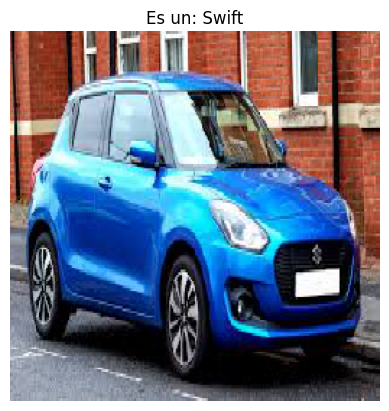

In [26]:
predict('./dataset/test/Swift/25.jpg')